In [1]:
# IMPORT STATEMENTS
import cv2
import re
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.patches as patches
import matplotlib.colors as colors
import PIL
import math
%matplotlib inline
import pandas as pd
import seaborn as sns
import json
from scipy.stats import fisher_exact, ttest_ind
from collections import Counter
from pprint import pprint
import os
import pickle
import sys
sys.path.append("/booleanfs2/sahoo/Hegemon/")
import StepMiner as smn
import HegemonUtil as hu
acolor = ["#00CC00", "#D8A03D","#EC008C",
          'cyan', "#B741DC", "#808285",
          'blue', 'black', 'green', 'red',
          'orange', 'brown', 'pink', 'purple']

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def getPDF(cfile):
    import bone
    reload(bone)
    from matplotlib.backends.backend_pdf import PdfPages

    pdf = PdfPages(cfile)
    return pdf

def closePDF(pdf):
    import datetime
    d = pdf.infodict()
    d['ModDate'] = datetime.datetime.today()
    pdf.close()
def getGene(ana, name):
    id1 = ana.h.getBestID(ana.h.getIDs(name).keys())
    expr = ana.h.getExprData(id1)
    lval = [[] for i in ana.atypes]
    if expr is None:
        print("Not Found")
        return lval
    aval = ana.aval
    for i in ana.h.aRange():
        if aval[i] is None:
            continue
        lval[aval[i]] += [float(expr[i])]
    return lval

Hatzis 2011 breast (n = 508)
GSE25066 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=BC8
508 397 111 0 BC8
[74]


/usr/local/lib/python3.6/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:268: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alpha, ci_labels)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:668: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/usr/local/lib/python3.6/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:268: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alph

Hatzis 2011 breast (n = 508)
GSE25066 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=BC8
508 397 111 0 BC8
[74]


/usr/local/lib/python3.6/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:268: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alpha, ci_labels)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:668: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/usr/local/lib/python3.6/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:268: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alph

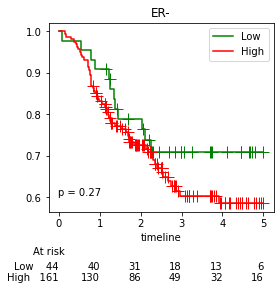

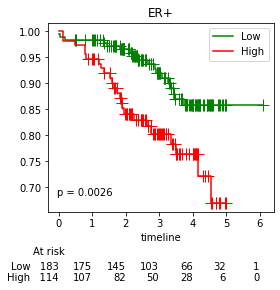

In [4]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/39_ER_KM.pdf"
pdf = getPDF(cfile)


def printTestSurvival(l1, wt1, ax = None, ERstat = None, HERstat = None, pthr=None):
    ana = bone.MacAnalysis()
    ana.getSurvival("BC8")
    gender = ana.h.getSurvName('c er_status_ihc')
    ana.order = [i for i in ana.order if gender[i] == ERstat]
    ana.orderData(l1, wt1)
    time = ana.h.getSurvName('time')
    status = ana.h.getSurvName('status')
    time1 = [time[i] for i in ana.order]
    status1 = [status[i] for i in ana.order]
    thr = hu.getThrData(ana.f_ranks)
    fthr = thr[0]
    group1 = [1 if ana.f_ranks[i - ana.h.start] > fthr else 0  for i in ana.order]



    df = pd.DataFrame()
    df['time'] = time1
    df['status'] = status1
    df['group'] = group1
    g1 = [i for i in df.index if df['group'][i] == 0]
    g2 = [i for i in df.index if df['group'][i] == 1]
    pG = [ ["Low", "green", g1], ["High", "red", g2]]
    time, status = hu.censor(df['time'], df['status'], 5)
    ax = hu.survival(time, status, pG, ax)
    return ax


wt1, l1 = [1], [bone.getEntries("Luker39.txt", 0)]


sax = printTestSurvival(l1, wt1, None,  'N')
sax.set_title('ER-')
pdf.savefig(transparent=True)

sax = printTestSurvival(l1, wt1, None,  'P')
sax.set_title('ER+')
pdf.savefig(transparent=True)
closePDF(pdf)

Hatzis 2011 breast (n = 508)
GSE25066 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=BC8
508 397 111 0 BC8
[74]
[74]


/usr/local/lib/python3.6/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:268: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alpha, ci_labels)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:668: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/usr/local/lib/python3.6/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:268: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alph

Hatzis 2011 breast (n = 508)
GSE25066 http://hegemon.ucsd.edu/Tools/explore.php?key=blood:leukemia&id=BC8
508 397 111 0 BC8
[74]
[74]


/usr/local/lib/python3.6/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:268: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alpha, ci_labels)
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:668: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
/usr/local/lib/python3.6/dist-packages/lifelines/fitters/kaplan_meier_fitter.py:268: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alph

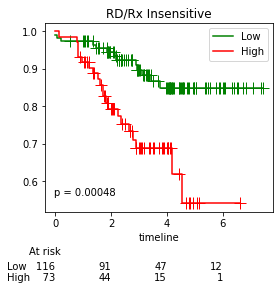

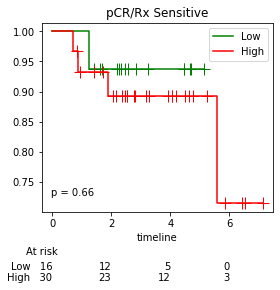

In [5]:
import bone
reload(bone)
cfile = "/Users/sinha7290/public_html/BoNE/39_Rx_km.pdf"
pdf = getPDF(cfile)


def printTestSurvival(l1, wt1, ax = None, ERstat = None, HERstat = None, pthr=None):
    ana = bone.MacAnalysis()
    ana.getSurvival("BC8")
    gender = ana.h.getSurvName('c dlda30_prediction')
    ana.order = [i for i in ana.order if gender[i] == ERstat]
    ana.orderData(l1, wt1)
    gender2 = ana.h.getSurvName('c chemosensitivity_prediction')
    ana.order = [i for i in ana.order if gender2[i] == HERstat]
    ana.orderData(l1, wt1)
    time = ana.h.getSurvName('time')
    status = ana.h.getSurvName('status')
    time1 = [time[i] for i in ana.order]
    status1 = [status[i] for i in ana.order]
    thr = hu.getThrData(ana.f_ranks)
    fthr = thr[0]
    group1 = [1 if ana.f_ranks[i - ana.h.start] > fthr else 0  for i in ana.order]



    df = pd.DataFrame()
    df['time'] = time1
    df['status'] = status1
    df['group'] = group1
    g1 = [i for i in df.index if df['group'][i] == 0]
    g2 = [i for i in df.index if df['group'][i] == 1]
    pG = [ ["Low", "green", g1], ["High", "red", g2]]
    time, status = hu.censor(df['time'], df['status'], 200)
    ax = hu.survival(time, status, pG, ax)
    return ax



wt1, l1 = [1], [bone.getEntries("Luker39.txt", 0)]


sax = printTestSurvival(l1, wt1, None,  'RD', 'Rx Insensitive')
sax.set_title('RD/Rx Insensitive')
pdf.savefig(transparent=True)

sax = printTestSurvival(l1, wt1, None,  'pCR', 'Rx Sensitive')
sax.set_title('pCR/Rx Sensitive')
pdf.savefig(transparent=True)
closePDF(pdf)